0.7.1
   A  B  C  D
A  0  1  3  0
B  0  0  1  2
C  0  0  0  2
D  0  0  0  0


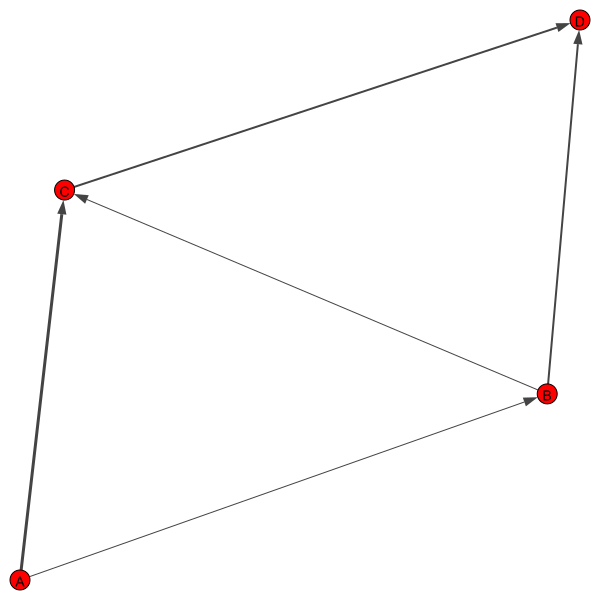

In [1]:
from igraph import *
import pandas as pd
import igraph

print igraph.__version__

a = pd.read_csv('matrix.csv', header=0, index_col=0, sep=';')

print a

# Get the values as np.array, it's more convenenient.
A = a.values

# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
graphe = igraph.Graph.Adjacency((A > 0).tolist())

# Add edge weights and node labels.
graphe.es['weight'] = A[A.nonzero()]
graphe.vs['label'] = a.index # or a.index/a.columns
graphe.vs['name'] = graphe.vs['label']
graphe.es['width'] = A[A.nonzero()]

layout = graphe.layout("kk")
plot(graphe, layout=layout)

In [2]:
res = Graph.shortest_paths(graphe, source='A',target='D', mode='OUT', weights = graphe.es['weight'])
print res

[[3.0]]


In [3]:
path = graphe.get_shortest_paths(graphe.vs.select(name='A')[0], to = 'D', weights = graphe.es['weight'], mode='OUT', output = 'vpath')

print "Shortest path : "

for step in path[0] : 
    print graphe.vs[step].attributes()['name']

A
B
D
